In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the input file

d1 = pd.read_csv("train.csv")

d1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
d1.shape

(1460, 81)

In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
d1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
d1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'none'
filling_null = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature" ,'Electrical']
for i in filling_null:
    d1[i].fillna('None', inplace=True)

In [8]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = d1.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(d1[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

d1.drop(columnsToBeRemoved, axis = 1, inplace = True)

d1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [9]:
#checking nulls again 
d1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea   

In [10]:
#checking the remaining columns ditribution and filling with median or mode 
d1['LotFrontage'].describe()
d1['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [11]:
d1['GarageYrBlt'].describe()
d1['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [12]:
d1['MasVnrArea'].describe()
d1['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [13]:
#  filling column Electrical and MasVnr Area with mode values as they are repeated high number of times and rest with median values as outliers are present 


# Impute the null values with median values for LotFrontage and MasVnrArea columns

d1['LotFrontage'] = d1['LotFrontage'].replace(np.nan, d1['LotFrontage'].median())
d1['MasVnrArea'] = d1['MasVnrArea'].replace(np.nan, d1['MasVnrArea'].median())
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

d1['GarageYrBlt']=d1['GarageYrBlt'].fillna(0)
d1['GarageYrBlt'] = d1['GarageYrBlt'].astype(int)

In [14]:
d1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

In [15]:
# Check if there are any duplicate values in the dataset

d1[d1.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice


In [16]:


d1.shape
#no duplicate values were present


(1460, 60)

In [17]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
d1['IsRemodelled'] = d1.apply(checkForRemodel, axis=1)
d1.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [18]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
d1['BuiltOrRemodelAge'] = d1.apply(getBuiltOrRemodelAge, axis=1)
d1.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [19]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
d1['OldOrNewGarage'] = d1['GarageYrBlt'].apply(getGarageConstructionPeriod)
d1.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [20]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

d1.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [21]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = d1.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(d1[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
d1.drop(columnsToBeRemoved, axis = 1, inplace = True)

d1.drop(['MoSold'], axis = 1, inplace = True)

d1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [22]:
#checking for outliers : 

# Checking outliers at 25%,50%,75%,90%,95% and above

d1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


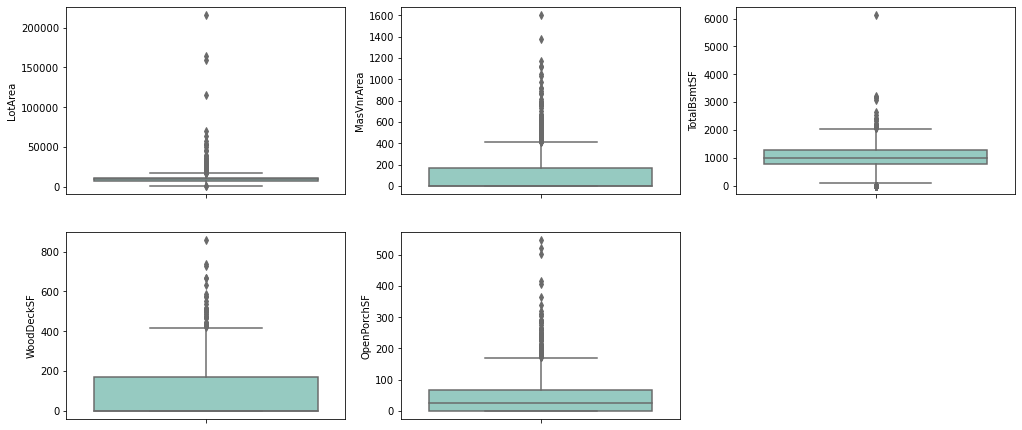

In [23]:


plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = d1)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = d1)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = d1)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = d1)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = d1)
plt.show()

In [24]:
# Removing Outliers

# Removing values LotArea

nn_quartile_LotArea = d1['LotArea'].quantile(0.99)
d1 = d1[d1["LotArea"] < nn_quartile_LotArea]

# Removing values for MasVnrArea

nn_quartile_MasVnrArea = d1['MasVnrArea'].quantile(0.99)
d1 = d1[d1["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values for TotalBsmtSF

nn_quartile_TotalBsmtSF = d1['TotalBsmtSF'].quantile(0.99)
d1 = d1[d1["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values for WoodDeckSF

nn_quartile_WoodDeckSF = d1['WoodDeckSF'].quantile(0.99)
d1 = d1[d1["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values for OpenPorchSF

nn_quartile_OpenPorchSF = d1['OpenPorchSF'].quantile(0.99)
d1 = d1[d1["OpenPorchSF"] < nn_quartile_OpenPorchSF]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

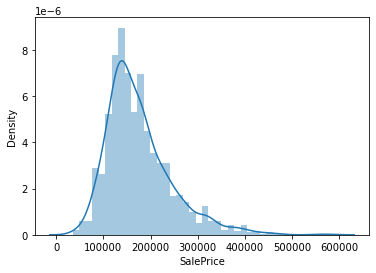

In [25]:
#Performing EDA
sns.distplot(d1['SalePrice'])
#the data is left skewed 


Text(0.5, 1.0, 'Sales Price with respect to Neighbourhood')

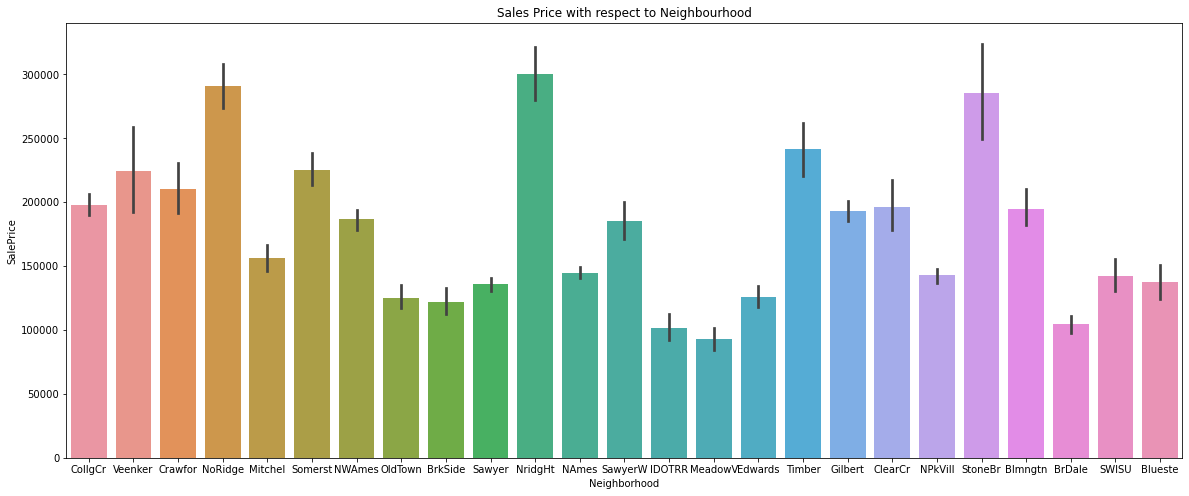

In [26]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= d1)
plt.title("Sales Price with respect to Neighbourhood")
#The prices seem to be higher in som of the neigbourhood 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

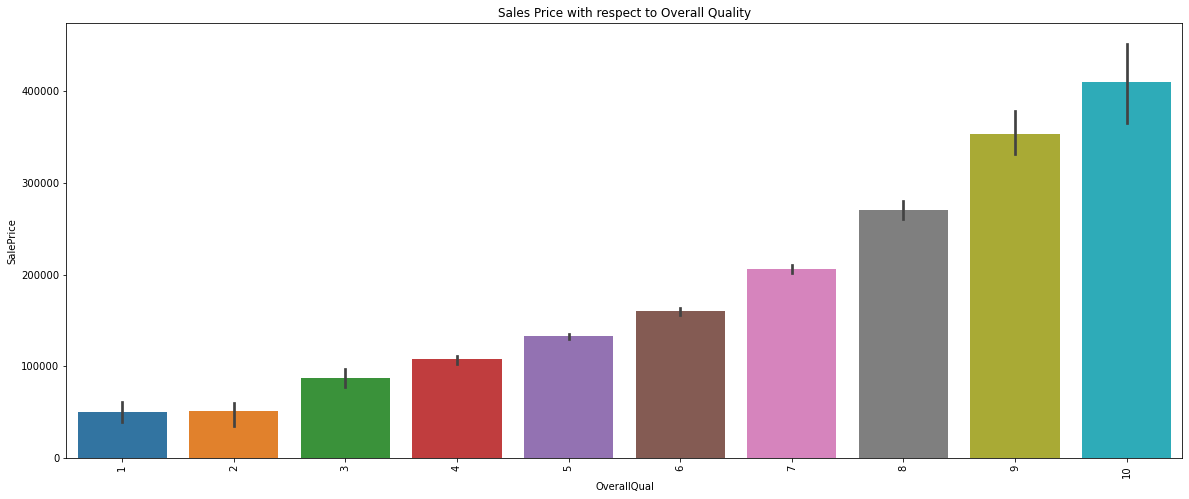

In [27]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= d1)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#Prices increase with the increase in quality.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

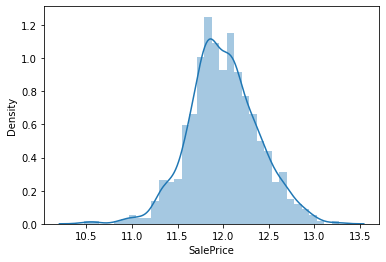

In [28]:
#Log Transformation
d1['SalePrice']=np.log1p(d1['SalePrice'])
sns.distplot(d1['SalePrice'])

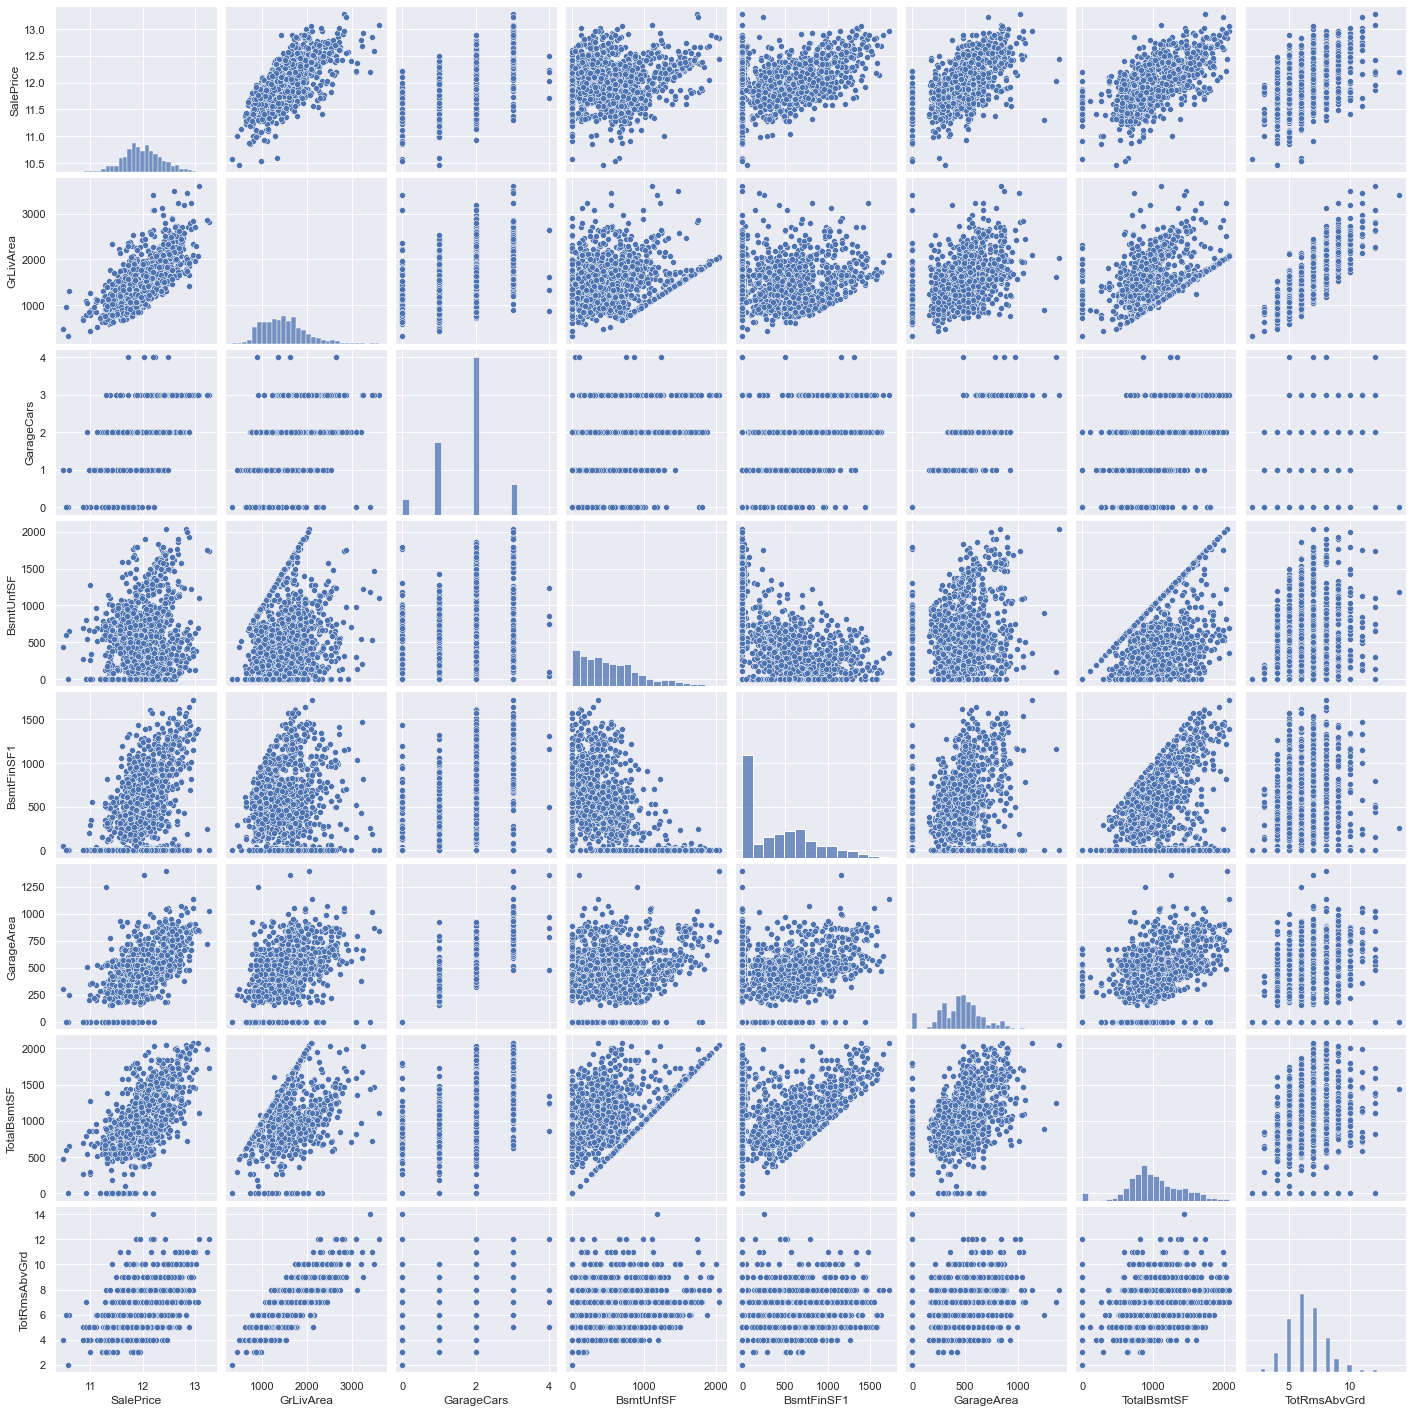

In [29]:
# Checking  with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd']
sns.pairplot(d1[cols], size = 2.5)
plt.show()

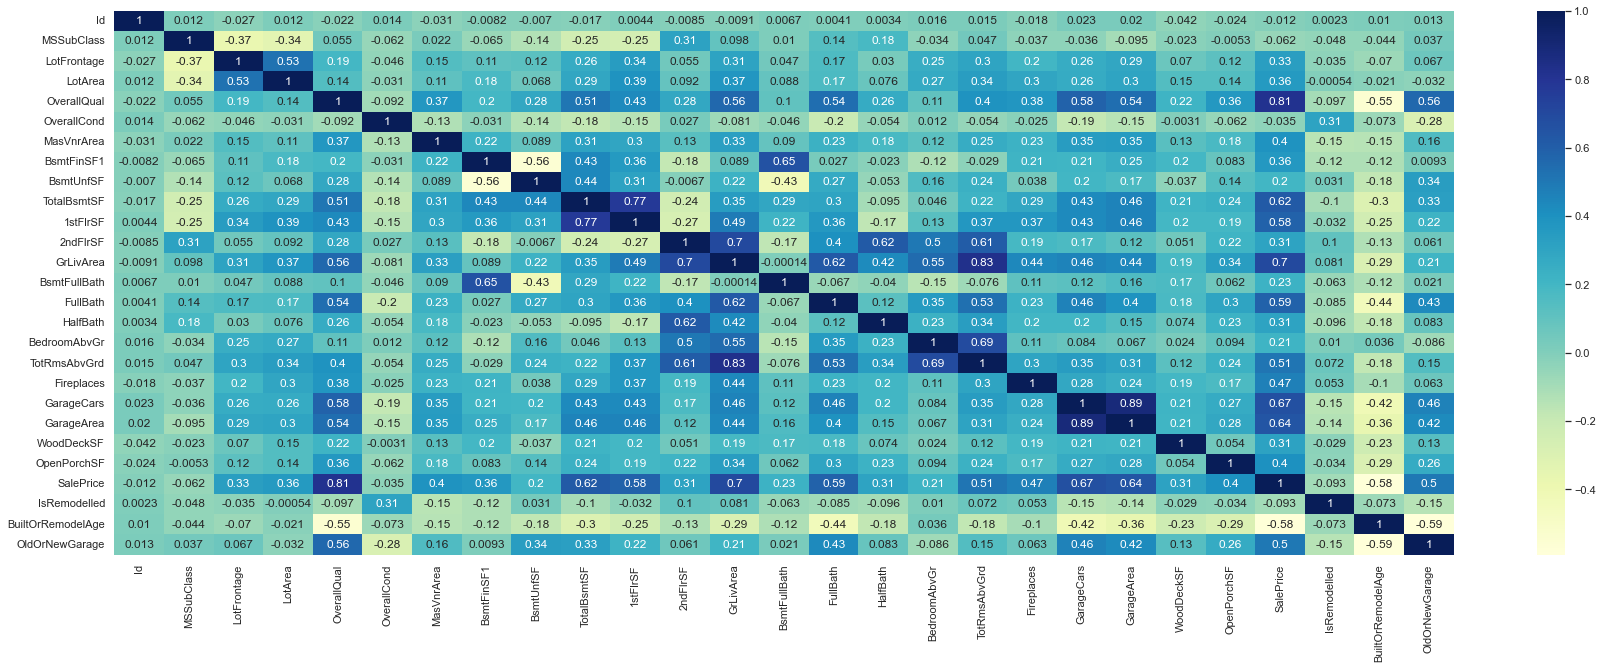

In [30]:
# correlation matrix
cor = d1.corr()
cor

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,10))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [31]:
d1 = d1.drop(['GarageArea'], axis = 1)
d1 = d1.drop(['TotalBsmtSF'], axis = 1)
d1 = d1.drop(['TotRmsAbvGrd'], axis = 1)
d1 = d1.drop(['GrLivArea'], axis = 1)    

d1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,RFn,2,0,61,None,Normal,12.247699,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,RFn,2,298,0,None,Normal,12.109016,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,RFn,2,0,42,None,Normal,12.317171,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,Unf,3,0,35,None,Abnorml,11.849405,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,RFn,3,192,84,None,Normal,12.429220,0,8,1


In [32]:
#Numeric columns
d1.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,...,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,65.0,8450,7,5,196.0,706,150,856,...,1,3,0,2,0,61,12.247699,0,5,1
1,2,20,80.0,9600,6,8,0.0,978,284,1262,...,0,3,1,2,298,0,12.109016,0,31,0
2,3,60,68.0,11250,7,5,162.0,486,434,920,...,1,3,1,2,0,42,12.317171,1,6,1
3,4,70,60.0,9550,7,5,0.0,216,540,961,...,0,3,1,3,0,35,11.849405,1,36,0
4,5,60,84.0,14260,8,5,350.0,655,490,1145,...,1,4,1,3,192,84,12.429220,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,62.0,7500,7,5,0.0,410,811,1221,...,0,2,0,2,0,113,12.128117,1,4,1
1455,1456,60,62.0,7917,6,5,0.0,0,953,953,...,1,3,1,2,0,40,12.072547,1,7,0
1456,1457,20,85.0,13175,6,6,119.0,790,589,2073,...,0,3,2,2,349,0,12.254868,1,22,0
1457,1458,70,66.0,9042,7,9,0.0,275,877,1188,...,0,4,2,1,0,60,12.493133,1,4,0


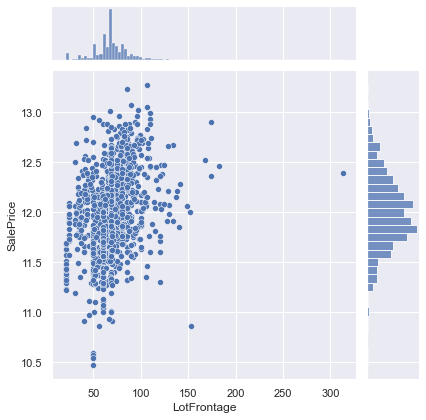

In [33]:
# Lot frontage vs SalePrice 
sns.jointplot(x = d1['LotFrontage'], y = d1['SalePrice'])
plt.show()

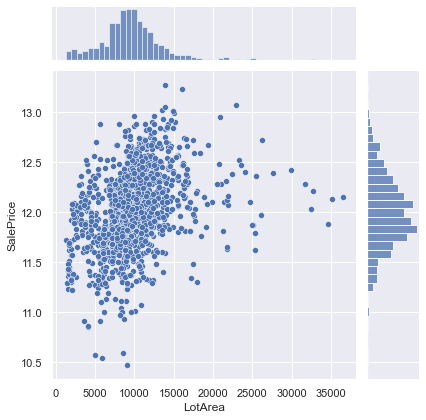

In [34]:
# LotArea vs SalePrice
sns.jointplot(x = d1['LotArea'], y = d1['SalePrice'])
plt.show()

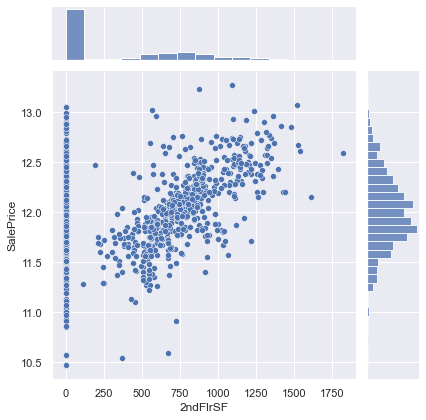

In [35]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = d1['2ndFlrSF'], y = d1['SalePrice'])
plt.show()

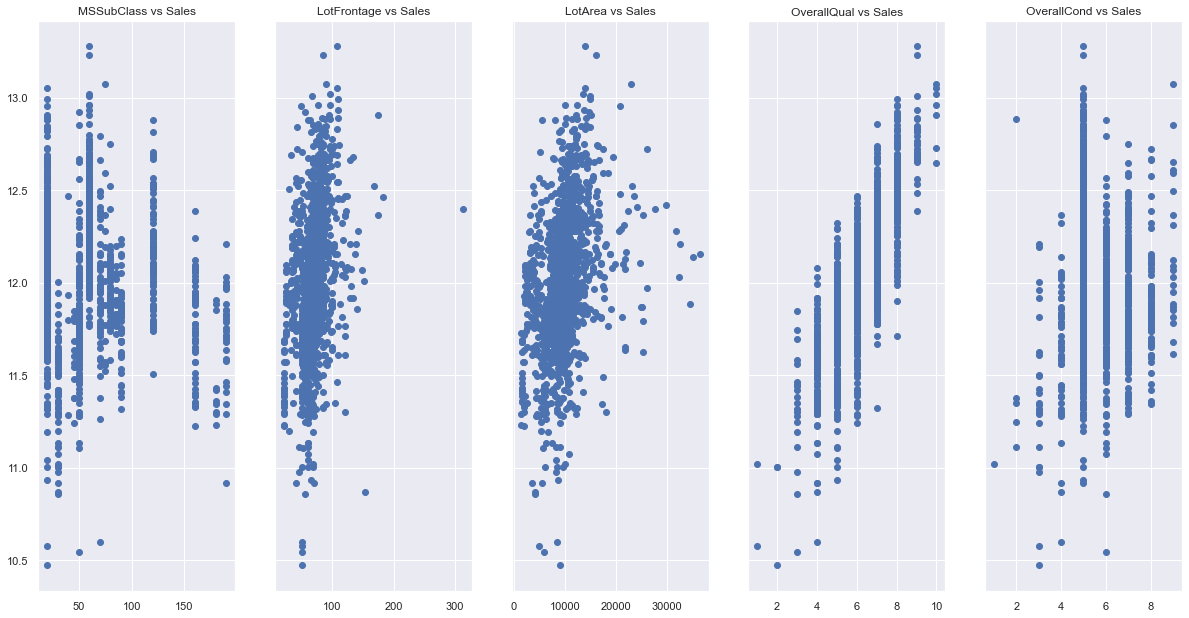

In [36]:
fig, ax = plt.subplots(ncols=5, sharey=True)

MSSubClass = ax[0].scatter(d1['MSSubClass'], d1['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')

LotFrontage= ax[1].scatter(d1['LotFrontage'], d1['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales')

LotArea = ax[2].scatter(d1['LotArea'], d1['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(d1['OverallQual'], d1['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(d1['OverallCond'], d1['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')




fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()
#['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
#'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2nd1lrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']

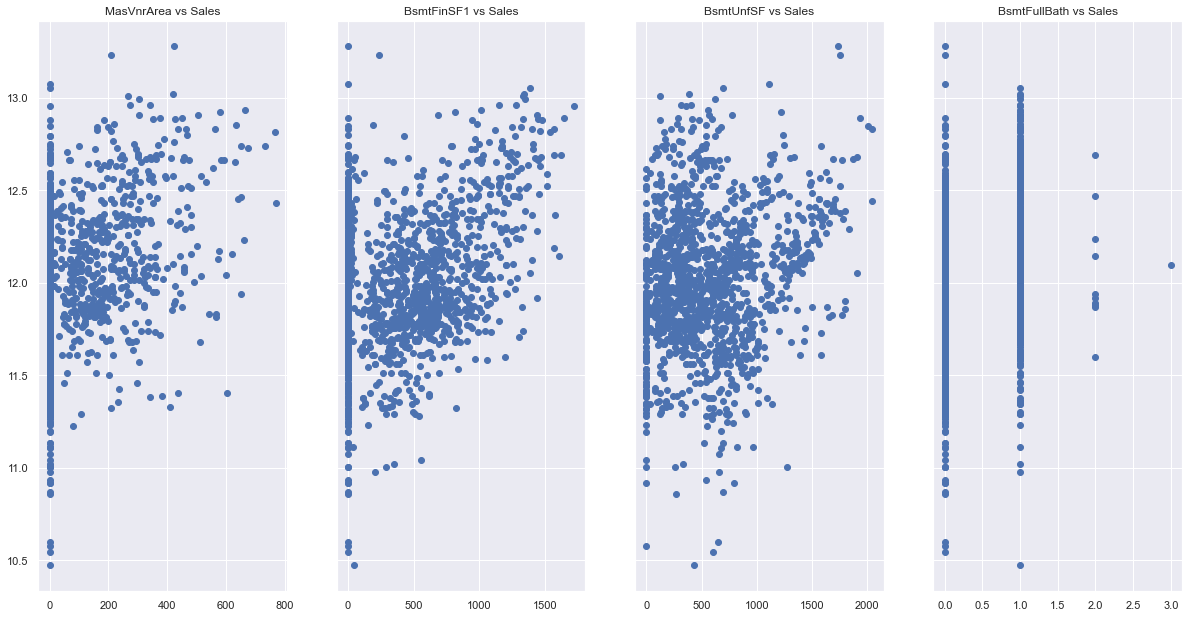

In [37]:
fig, ax = plt.subplots(ncols=4, sharey=True)



MasVnrArea= ax[0].scatter(d1['MasVnrArea'], d1['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[0].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[1].scatter(d1['BsmtFinSF1'], d1['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[1].set_title('BsmtFinSF1 vs Sales')



BsmtUnfSF = ax[2].scatter(d1['BsmtUnfSF'], d1['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[2].set_title('BsmtUnfSF vs Sales')


BsmtFullBath = ax[3].scatter(d1['BsmtFullBath'], d1['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[3].set_title('BsmtFullBath vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

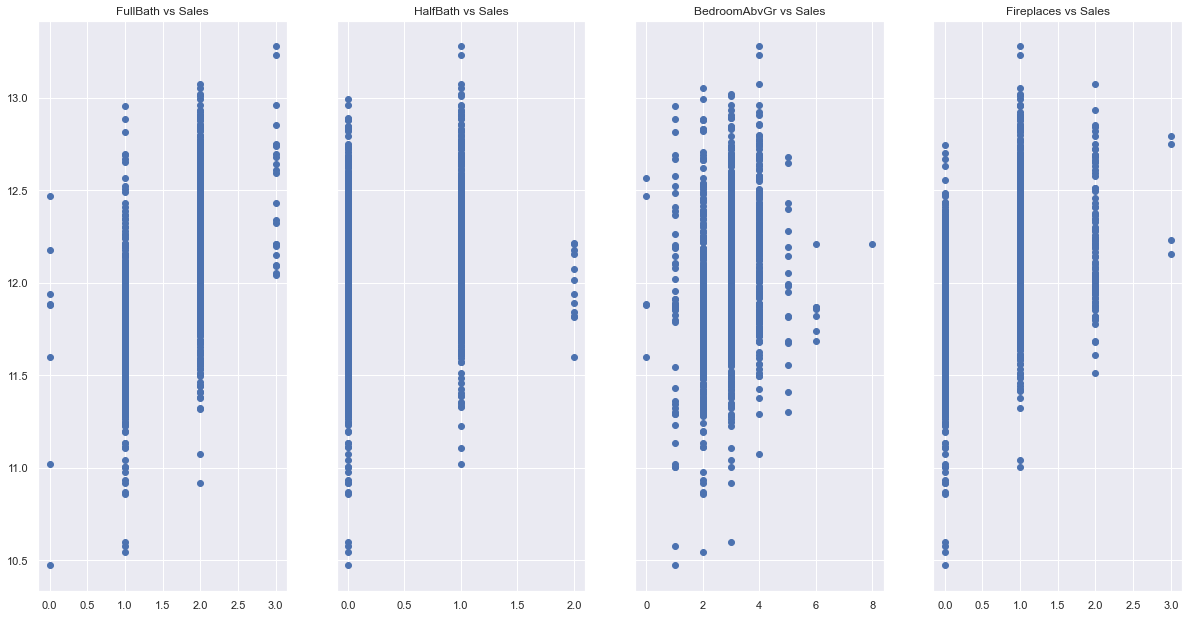

In [38]:
#['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=4, sharey=True)

FullBath = ax[0].scatter(d1['FullBath'], d1['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(d1['HalfBath'], d1['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(d1['BedroomAbvGr'], d1['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')




Fireplaces = ax[3].scatter(d1['Fireplaces'], d1['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[3].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

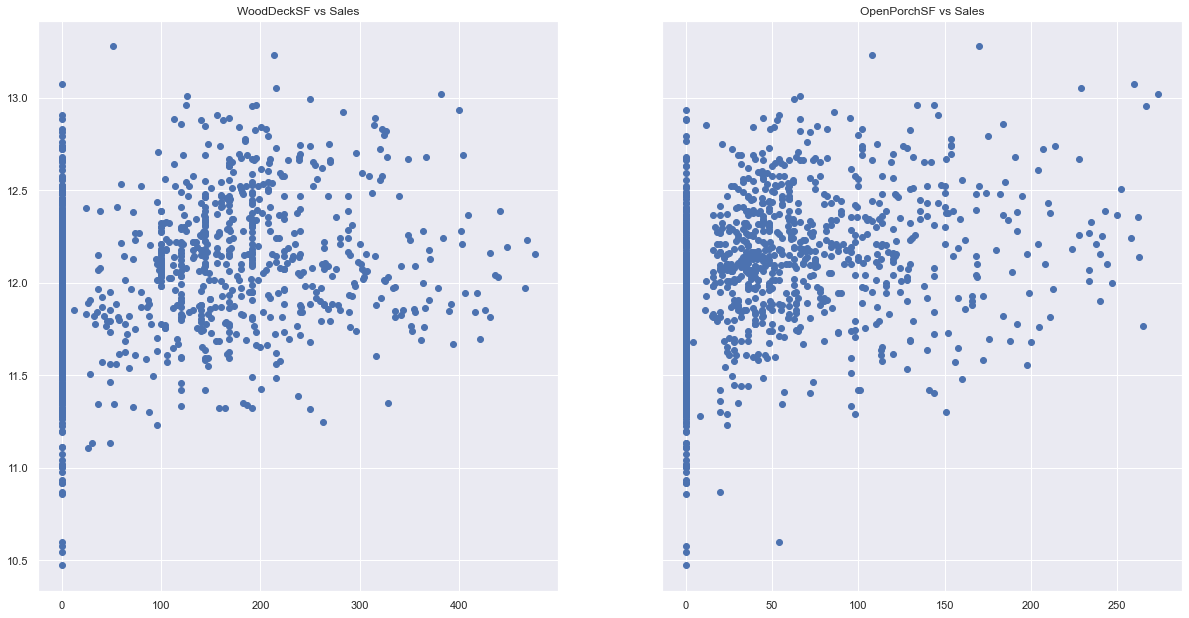

In [39]:
#[GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=2, sharey=True)



WoodDeckSF = ax[0].scatter(d1['WoodDeckSF'], d1['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[0].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[1].scatter(d1['OpenPorchSF'], d1['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[1].set_title('OpenPorchSF vs Sales')




fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [40]:
#Data Preparation 

In [41]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

d1['d_LotShape'] = d1['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
d1['d_ExterQual'] = d1['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
d1['d_BsmtQual'] = d1['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
d1['d_BsmtExposure'] = d1['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
d1['d_BsmtFinType1'] = d1['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,  'None': 0})
d1['d_HeatingQC'] = d1['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
d1['d_KitchenQual'] = d1['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
d1['d_FireplaceQu'] = d1['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
d1['d_GarageFinish'] = d1['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
d1['d_BldgType'] = d1['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
d1['d_HouseStyle'] = d1['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
d1['d_Fence'] = d1['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
d1['d_LotConfig'] = d1['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1,  'None': 0  })
d1['d_MasVnrType'] = d1['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
d1['d_SaleCondition'] = d1['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})

d1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [42]:
# drop the old columns from which the new columns were derived
# We can also drop the 

d1 = d1.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

d1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [43]:
# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(d1['MSZoning'], prefix='MSZoning', drop_first = True)
d1 = pd.concat([d1, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(d1['Neighborhood'], prefix='Neighborhood', drop_first = True)
d1 = pd.concat([d1, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(d1['RoofStyle'], prefix='RoofStyle', drop_first = True)
d1 = pd.concat([d1, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(d1['Exterior1st'], prefix='Exterior1st', drop_first = True)
d1 = pd.concat([d1, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(d1['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
d1 = pd.concat([d1, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(d1['Foundation'], prefix='Foundation', drop_first = True)
d1 = pd.concat([d1, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(d1['GarageType'], prefix='GarageType', drop_first = True)
d1 = pd.concat([d1, d_GarageType], axis = 1)

d1.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [44]:
# drop the below columns as we now have new columns derived from these columns

d1 = d1.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation','GarageType'], axis=1)

d1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,854,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,0,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,866,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,961,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,...,1,0,0,0,1,0,0,0,0,0


In [45]:
#Splitting the data 

In [46]:
# Putting all feature variable to X

X = d1.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,854,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,0,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,866,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,961,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,...,1,0,0,0,1,0,0,0,0,0


In [47]:
# Putting response variable to y

y = d1['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [48]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=109)

In [49]:
# split into train and test

from sklearn.model_selection import train_test_split


np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [50]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 90)            
rfe = rfe.fit(X_train, y_train)

In [51]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,LotArea,True,1
3,OverallQual,True,1
4,OverallCond,True,1
...,...,...,...
85,GarageType_Attchd,True,1
86,GarageType_Basment,True,1
87,GarageType_BuiltIn,True,1
88,GarageType_Detchd,True,1


In [52]:
# Assign the 90 columns to X_train_rfe

X_train_rfe = X_train[col]

In [53]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [54]:
#Model buiding 

In [55]:
#LASSO
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01 ,1 , 2 ,3 ,5 ,10]}

# cross validation

folds = 6
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 6 folds for each of 16 candidates, totalling 96 fits


GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 1,
                                   2, 3, 5, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
7,0.003,-0.078061,-0.085604,1
6,0.002,-0.077091,-0.085649,2
8,0.004,-0.079054,-0.085824,3
4,0.0005,-0.074356,-0.085863,4
3,0.0004,-0.074082,-0.085867,5
2,0.0003,-0.073830,-0.085878,6
5,0.001,-0.075760,-0.085919,7
1,0.0002,-0.073627,-0.086010,8
0,0.0001,-0.073473,-0.086140,9
9,0.005,-0.080156,-0.086207,10


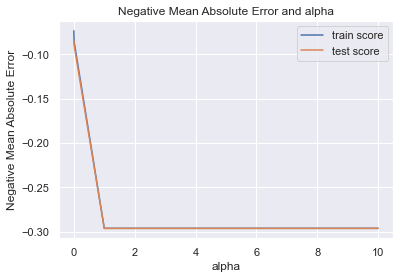

In [57]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [58]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.003)

In [59]:
# check the coefficient values with lambda = 0.003

alpha = 0.003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01283092,  0.00684901,  0.01885767,  0.09382379,  0.0393304 ,
        0.00649524,  0.04373074,  0.01406779,  0.09672308,  0.08927527,
        0.01138918,  0.01053166,  0.01191155,  0.02552228,  0.01449664,
        0.00830943, -0.00879048, -0.01693051,  0.00729919, -0.00269315,
        0.00178993,  0.01660547,  0.01430895,  0.00929247,  0.01043152,
        0.01509857,  0.01445273,  0.01072634, -0.00416835,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.01845143,  0.01787712,
        0.00131755,  0.01539576, -0.        , -0.        , -0.        ,
        0.        ,  0.01286468, -0.0004343 , -0.        , -0.01036226,
       -0.00446102, -0.        , -0.        , -0.        ,  0.01601584,
       -0.01713296, -0.        , -0.00172813,  0.        ,  0.        ,
        0.01123311, -0.        ,  0.00270797, -0.        ,  0.00296122,
        0.        ,  0.        , -0.01632919,  0.01600181, -0.        ,
        0.00079991, -0.        ,  0.        ,  0.00509866,  0.00

In [60]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.0159117674071282

In [61]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0128
1,LotFrontage,0.0068
2,LotArea,0.0189
3,OverallQual,0.0938
4,OverallCond,0.0393
5,MasVnrArea,0.0065
6,BsmtFinSF1,0.0437
7,BsmtUnfSF,0.0141
8,1stFlrSF,0.0967
9,2ndFlrSF,0.0893


In [62]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.012830923601792802,
 'LotFrontage': 0.006849006493118747,
 'LotArea': 0.018857671881447116,
 'OverallQual': 0.0938237943912135,
 'OverallCond': 0.03933039631104484,
 'MasVnrArea': 0.0064952423710844505,
 'BsmtFinSF1': 0.043730741574588325,
 'BsmtUnfSF': 0.014067785812882603,
 '1stFlrSF': 0.09672307791391317,
 '2ndFlrSF': 0.08927527089256014,
 'BsmtFullBath': 0.011389182326256403,
 'FullBath': 0.010531657096219997,
 'HalfBath': 0.011911552909861348,
 'GarageCars': 0.025522281876082742,
 'WoodDeckSF': 0.014496642154043404,
 'OpenPorchSF': 0.008309425637154803,
 'IsRemodelled': -0.008790483942599308,
 'BuiltOrRemodelAge': -0.016930511420409453,
 'OldOrNewGarage': 0.007299194923131131,
 'd_LotShape': -0.0026931482683861083,
 'd_ExterQual': 0.0017899250311614445,
 'd_BsmtQual': 0.016605471780253386,
 'd_BsmtExposure': 0.01430895475254329,
 'd_BsmtFinType1': 0.009292471892155194,
 'd_HeatingQC': 0.010431521999839315,
 'd_KitchenQual': 0.01509856938026534,
 'd_FireplaceQu': 

In [63]:
#Applying RFE
# Do an RFE to minimise the features to 20

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train_lasso, y_train)

In [64]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.096723
2,OverallQual,True,1,0.093824
7,2ndFlrSF,True,1,0.089275
4,BsmtFinSF1,True,1,0.043731
3,OverallCond,True,1,0.039330
19,Foundation_PConc,True,1,0.027925
8,GarageCars,True,1,0.025522
1,LotArea,True,1,0.018858
14,d_SaleCondition,True,1,0.018451
15,MSZoning_FV,True,1,0.017877


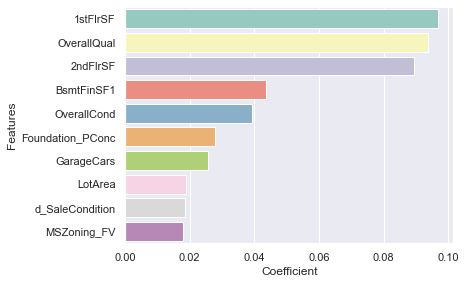

In [65]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set3', data = temp2_df)
plt.show()

In [66]:
#RIDGE
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500]}

ridge = Ridge()

# cross validation

folds = 6
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 6 folds for each of 26 candidates, totalling 156 fits


GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,
                                   500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,20,-0.074656,-0.085458,1
21,10.0,-0.074063,-0.085604,2
20,9.0,-0.073994,-0.085629,3
19,8.0,-0.073923,-0.085659,4
18,7.0,-0.073850,-0.085692,5
23,50,-0.075973,-0.085720,6
17,6.0,-0.073774,-0.085728,7
16,5.0,-0.073696,-0.085768,8
15,4.0,-0.073618,-0.085812,9
14,3.0,-0.073546,-0.085892,10


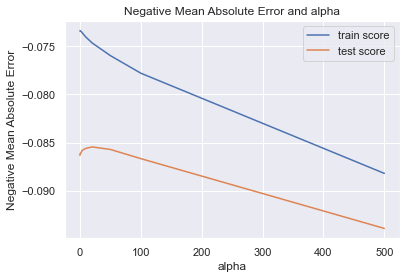

In [68]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [69]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=20)

In [70]:
# check the coefficient values with lambda = 20

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01701941,  0.00821311,  0.02210641,  0.08155685,  0.04161312,
        0.00706289,  0.04706491,  0.02497564,  0.08864169,  0.08489287,
        0.01749341,  0.01647335,  0.01444237,  0.02063794,  0.01580539,
        0.00797543, -0.00982618, -0.01664175,  0.00963455, -0.00585775,
       -0.00366588,  0.01143047,  0.01537855,  0.01147805,  0.01190194,
        0.01498312,  0.0151107 ,  0.00979903, -0.00912092,  0.00784295,
       -0.00377715,  0.00221321,  0.00315557,  0.01643551,  0.0337945 ,
        0.0117717 ,  0.04454243,  0.03178063, -0.00580467, -0.00425912,
       -0.00702907,  0.01098945, -0.01075895, -0.0076611 , -0.01637551,
       -0.01609277, -0.00712535, -0.01479809, -0.01002683,  0.01862398,
       -0.02755146, -0.0023499 , -0.01369327, -0.00086562, -0.00076575,
        0.01488515, -0.00333832,  0.00340922,  0.00614307,  0.01042456,
        0.00935578,  0.00333578, -0.02072912,  0.02581023, -0.00034073,
        0.00981527,  0.01486883,  0.00326265,  0.01461497,  0.01

In [71]:


# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.016724219916660496

In [72]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0170
1,LotFrontage,0.0082
2,LotArea,0.0221
3,OverallQual,0.0816
4,OverallCond,0.0416
...,...,...
85,GarageType_Attchd,0.0289
86,GarageType_Basment,-0.0003
87,GarageType_BuiltIn,0.0149
88,GarageType_Detchd,0.0215


In [73]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.017,
 'LotFrontage': 0.0082,
 'LotArea': 0.0221,
 'OverallQual': 0.0816,
 'OverallCond': 0.0416,
 'MasVnrArea': 0.0071,
 'BsmtFinSF1': 0.0471,
 'BsmtUnfSF': 0.025,
 '1stFlrSF': 0.0886,
 '2ndFlrSF': 0.0849,
 'BsmtFullBath': 0.0175,
 'FullBath': 0.0165,
 'HalfBath': 0.0144,
 'GarageCars': 0.0206,
 'WoodDeckSF': 0.0158,
 'OpenPorchSF': 0.008,
 'IsRemodelled': -0.0098,
 'BuiltOrRemodelAge': -0.0166,
 'OldOrNewGarage': 0.0096,
 'd_LotShape': -0.0059,
 'd_ExterQual': -0.0037,
 'd_BsmtQual': 0.0114,
 'd_BsmtExposure': 0.0154,
 'd_BsmtFinType1': 0.0115,
 'd_HeatingQC': 0.0119,
 'd_KitchenQual': 0.015,
 'd_FireplaceQu': 0.0151,
 'd_GarageFinish': 0.0098,
 'd_BldgType': -0.0091,
 'd_HouseStyle': 0.0078,
 'd_Fence': -0.0038,
 'd_LotConfig': 0.0022,
 'd_MasVnrType': 0.0032,
 'd_SaleCondition': 0.0164,
 'MSZoning_FV': 0.0338,
 'MSZoning_RH': 0.0118,
 'MSZoning_RL': 0.0445,
 'MSZoning_RM': 0.0318,
 'Neighborhood_BrDale': -0.0058,
 'Neighborhood_BrkSide': -0.0043,
 'Neighborhood_Col

In [74]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train_ridge, y_train)


In [75]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
5,1stFlrSF,True,1,0.0886
6,2ndFlrSF,True,1,0.0849
1,OverallQual,True,1,0.0816
3,BsmtFinSF1,True,1,0.0471
12,MSZoning_RL,True,1,0.0445
2,OverallCond,True,1,0.0416
16,Foundation_PConc,True,1,0.0407
10,MSZoning_FV,True,1,0.0338
13,MSZoning_RM,True,1,0.0318
17,GarageType_Attchd,True,1,0.0289


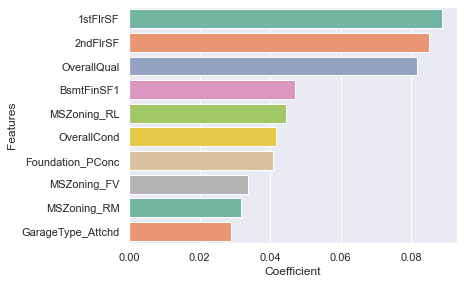

In [76]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()

In [77]:
#CONCLUSION 
#The optimal lambda value in case of Ridge and Lasso is as below:

#Ridge - 20
#Lasso - 0.003
#The Mean Squared error in case of Ridge and Lasso are:

#Ridge - 0.016724219916660496
#Lasso - 0.0159117674071282
#The Mean Squared Error of Lasso is slightly lower than that of Ridge

#Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

#Hence based on Lasso, the factors that generally affect the price are the 1stFLrsf, Overall quality ,2ndFlrSF, bSMNTfIN, overall condition , garagecars , lotarea etc. 





In [78]:
#####
#Implementing the questions given : 
#implemented on the above code only and made changes back again 

